<a href="https://colab.research.google.com/github/mashyko/deep-learning/blob/master/MNIST_keras_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kerasを用いたMNISTデータの手書き数字の識別

　　Tensorfloww 2.0で実行します：tensoerflow.kerasを採用


In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

11493376/11490434 [==============================] - 0s 0us/step


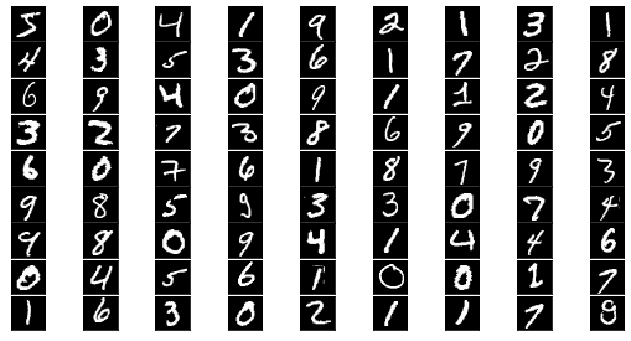

In [3]:
%matplotlib inline
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

#Kerasの関数でデータの読み込み。データをシャッフルして学習データと訓練データに分割してくれる
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#MNISTデータの表示
fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import keras
#from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

#データの入力シェイプをtensorflow用に変換
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_test, y_test))

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0418 - accuracy: 0.9855 - val_loss: 0.0095 - val_accuracy: 0.9966
Epoch 2/12
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.0067 - val_accuracy: 0.9976
Epoch 3/12
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0058 - val_accuracy: 0.9978
Epoch 4/12
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.0058 - val_accuracy: 0.9980
Epoch 5/12
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0084 - accuracy: 0.9972 - val_loss: 0.0056 - val_accuracy: 0.9980
Epoch 6/12
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0076 - accuracy: 0.9975 - val_loss: 0.0055 - val

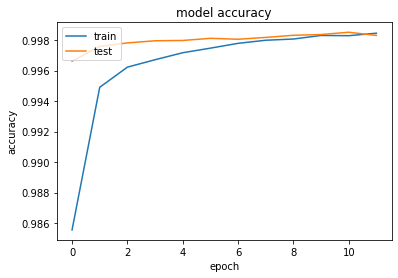

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

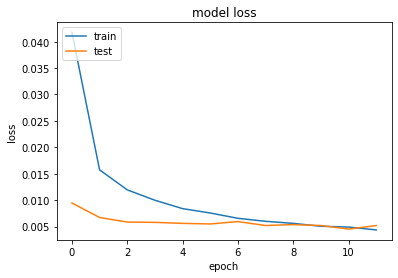

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()